# Data Acquisition and Cleaning

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [3]:
df_trt = pd.read_html(io="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M", na_values=['Not assigned'])[0]

# The neighborhood will be the same as the borough if cell has a borough but not assigned neighborhood
df_trt.Neighbourhood.fillna(df_trt.Borough, inplace = True)

# Delete datafram rows where Borough is not assigned
df_trt.dropna(inplace = True)

# Combine the Neighbourhood with same Postcode and Borough
df_trt_cob = df_trt.groupby(['Postcode','Borough'],as_index=False).agg(lambda n: ', '.join(n))
df_trt_cob.head()


,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [4]:
lat_long = pd.read_csv('http://cocl.us/Geospatial_data')
lat_long.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [5]:
# Rename the same column name ("Postcode") as above data
lat_long.rename(columns={"Postal Code": "Postcode"},inplace = True)
df_new = pd.merge(df_trt_cob, lat_long)
df_new.head(10)

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [6]:
# Toronto and East York distribution of population
trt_e_york = pd.read_html(io="https://en.m.wikipedia.org/wiki/Demographics_of_Toronto#Ethnic_diversity")[13]
trt_e_york = trt_e_york.rename(columns={'%':'Origin #1 %', 
                                        '%.1':'Origin #2 %',
                                        '%.2':'Origin #3 %',
                                        '%.3':'Origin #4 %',
                                        '%.4':'Origin #5 %',
                                        '%.5':'Origin #6 %',
                                        '%.6':'Origin #7 %',
                                        '%.7':'Origin #8 %',
                                        '%.8':'Origin #9 %'})
trt_e_york

,Riding,Population,Ethnic Origin #1,Origin #1 %,Ethnic Origin #2,Origin #2 %,Ethnic Origin #3,Origin #3 %,Ethnic Origin #4,Origin #4 %,Ethnic Origin #5,Origin #5 %,Ethnic Origin #6,Origin #6 %,Ethnic Origin #7,Origin #7 %,Ethnic Origin #8,Origin #8 %,Ethnic Origin #9,Origin #9 %
0,Spadina-Fort York,114315,English,16.4,Chinese,16.0,Irish,14.6,Canadian,14.0,Scottish,13.2,French,7.70,German,7.6,NaN,NaN,NaN,NaN
1,Beaches-East York,108435,English,24.2,Irish,19.9,Canadian,19.7,Scottish,18.9,French,8.7,German,8.40,NaN,NaN,NaN,NaN,NaN,NaN
2,Davenport,107395,Portuguese,22.7,English,13.6,Canadian,12.8,Irish,11.5,Italian,11.1,Scottish,11.00,NaN,NaN,NaN,NaN,NaN,NaN
3,Parkdale-High Park,106445,English,22.3,Irish,20.0,Scottish,18.7,Canadian,16.1,German,9.8,French,8.88,Polish,8.5,NaN,NaN,NaN,NaN
4,Toronto-Danforth,105395,English,22.9,Irish,19.5,Scottish,18.7,Canadian,18.4,Chinese,13.8,French,8.86,German,8.8,Greek,7.3,NaN,NaN
5,Toronto-St. Paul's,104940,English,18.5,Canadian,16.1,Irish,15.2,Scottish,14.8,Polish,10.3,German,7.90,Russian,7.7,Italian,7.3,French,7.2
6,University-Rosedale,100520,English,20.6,Irish,16.6,Scottish,16.3,Canadian,15.2,Chinese,14.7,German,8.70,French,7.7,Italian,7.4,NaN,NaN
7,Toronto Centre,99590,English,15.7,Canadian,13.7,Irish,13.4,Scottish,12.6,Chinese,12.5,French,7.20,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# North York distribution of population
north_york = pd.read_html(io="https://en.m.wikipedia.org/wiki/Demographics_of_Toronto#Ethnic_diversity")[14]
north_york = north_york.rename(columns={'%':'Origin #1 %', 
                                        '%.1':'Origin #2 %',
                                        '%.2':'Origin #3 %',
                                        '%.3':'Origin #4 %',
                                        '%.4':'Origin #5 %',
                                        '%.5':'Origin #6 %',
                                        '%.6':'Origin #7 %',
                                        '%.7':'Origin #8 %',
                                        '%.8':'Origin #9 %'})
north_york

,Riding,Population,Ethnic Origin #1,Origin #1 %,Ethnic Origin #2,Origin #2 %,Ethnic Origin #3,Origin #3 %,Ethnic Origin #4,Origin #4 %,Ethnic Origin #5,Origin #5 %,Ethnic Origin #6,Origin #6 %,Ethnic Origin #7,Origin #7 %,Ethnic Origin #8,Origin #8 %
0,Willowdale,117405,Chinese,25.9,Iranian,12.1,Korean,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Eglinton-Lawrence,112925,Canadian,14.7,English,12.6,Polish,12.0,Filipino,11.0,Scottish,9.7,Italian,9.5,Irish,9.2,Russian,8.4
2,Don Valley North,109060,Chinese,32.4,East Indian,7.3,Iranian,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Humber River-Black Creek,107725,Italian,12.8,East Indian,9.2,Jamaican,8.5,Vietnamese,8.0,Canadian,7.4,NaN,NaN,NaN,NaN,NaN,NaN
4,York Centre,103760,Filipino,17.0,Italian,13.4,Russian,9.5,Canadian,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Don Valley West,101790,English,19.2,Canadian,15.1,Scottish,14.9,Irish,14.2,Chinese,11.2,NaN,NaN,NaN,NaN,NaN,NaN
6,Don Valley East,93170,East Indian,10.6,Canadian,10.4,English,10.1,Chinese,8.9,Irish,8.1,Scottish,8.0,Filipino,7.8,NaN,NaN


In [7]:
# Scarborough distribution of population
scarb = pd.read_html(io="https://en.m.wikipedia.org/wiki/Demographics_of_Toronto#Ethnic_diversity")[15]
scarb = scarb.rename(columns={'%':'Origin #1 %', 
                                        '%.1':'Origin #2 %',
                                        '%.2':'Origin #3 %',
                                        '%.3':'Origin #4 %',
                                        '%.4':'Origin #5 %',
                                        '%.5':'Origin #6 %',
                                        '%.6':'Origin #7 %',
                                        '%.7':'Origin #8 %',
                                        '%.8':'Origin #9 %'})
scarb

,Riding,Population,Ethnic Origin #1,Origin #1 %,Ethnic Origin #2,Origin #2 %,Ethnic Origin #3,Origin #3 %,Ethnic Origin #4,Origin #4 %,Ethnic Origin #5,Origin #5 %,Ethnic Origin #6,Origin #6 %,Ethnic Origin #7,Origin #7 %,Ethnic Origin #8,Origin #8 %
0,Scarborough Centre,110450,Filipino,13.1,East Indian,12.2,Canadian,11.2,Chinese,10.7,English,7.8,Sri Lankan,7.0,NaN,NaN,NaN,NaN
1,Scarborough Southwest,108295,Canadian,16.2,English,14.3,Irish,11.5,Scottish,10.9,Filipino,9.5,East Indian,8.2,Chinese,7.2,NaN,NaN
2,Scarborough-Agincourt,104225,Chinese,47.0,East Indian,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Scarborough-Rouge Park,101445,East Indian,16.7,Canadian,11.8,Sri Lankan,11.1,English,9.8,Filipino,9.3,Jamaican,8.4,Scottish,7.2,Irish,7.0
4,Scarborough-Guildwood,101115,East Indian,18.0,Canadian,11.6,English,9.7,Filipino,8.5,Sri Lankan,7.8,Chinese,7.1,Scottish,7.0,NaN,NaN
5,Scarborough North,97610,Chinese,46.6,East Indian,11.8,Sri Lankan,9.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Etobicoke and York distribution of population
eto_york = pd.read_html(io="https://en.m.wikipedia.org/wiki/Demographics_of_Toronto#Ethnic_diversity")[16]
eto_york = eto_york.rename(columns={'%':'Origin #1 %', 
                                        '%.1':'Origin #2 %',
                                        '%.2':'Origin #3 %',
                                        '%.3':'Origin #4 %',
                                        '%.4':'Origin #5 %',
                                        '%.5':'Origin #6 %',
                                        '%.6':'Origin #7 %',
                                        '%.7':'Origin #8 %',
                                        '%.8':'Origin #9 %'})
eto_york

,Riding,Population,Ethnic Origin #1,Origin #1 %,Ethnic Origin #2,Origin #2 %,Ethnic Origin #3,Origin #3 %,Ethnic Origin #4,Origin #4 %,Ethnic Origin #5,Origin #5 %,Ethnic Origin #6,Origin #6 %,Ethnic Origin #7,Origin #7 %,Ethnic Origin #8,Origin #8 %
0,Etobicoke-Lakeshore,127520,English,17.1,Canadian,15.9,Irish,14.4,Scottish,13.5,Polish,9.2,Italian,9.1,Ukrainian,7.6,German,7.1
1,Etobicoke North,116960,East Indian,22.2,Canadian,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Etobicoke Centre,116055,Italian,15.1,English,14.3,Canadian,12.1,Irish,10.8,Scottish,10.4,Ukrainian,8.1,Polish,7.4,NaN,NaN
3,York South-Weston,115130,Portuguese,14.5,Italian,12.8,Canadian,8.7,Jamaican,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Get the latitude and longitude values of Toronto.

address = 'Toronto'

geolocator = Nominatim(user_agent="trt_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [37]:
CLIENT_ID = 'I0VY5KZJU1QXN44V4ME3BPRYIKKRPJACRSB2DXAIKWDENSNW' # your Foursquare ID
CLIENT_SECRET = 'O1JOBFWAL0SHZRDNWVHTE3GJGRADO5QGTDB4XG1AW21WGXWF' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100

radius = 1500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)

results = requests.get(url).json()

In [38]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [40]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Downtown Toronto,Neighborhood,43.653232,-79.385296
1,Nathan Phillips Square,Plaza,43.652270,-79.383516
2,Japango,Sushi Restaurant,43.655268,-79.385165
3,Four Seasons Centre for the Performing Arts,Concert Hall,43.650592,-79.385806
4,Art Gallery of Ontario,Art Gallery,43.654003,-79.392922


In [41]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [42]:
trt_venues = getNearbyVenues(names=df_new['Neighbourhood'],
                                   latitudes=df_new['Latitude'],
                                   longitudes=df_new['Longitude'])

trt_venues.head()

Rouge, Malvern
Highland Creek, Rouge Hill, Port Union
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
Silver Hills, York Mills
Newtonbrook, Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park, Don Mills South
Bathurst Manor, Downsview North, Wilson Heights
Northwood Park, York University
CFB Toronto, Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Woodbine Gardens, Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West, 

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Rouge, Malvern",43.806686,-79.194353,Images Salon & Spa,43.802283,-79.198565,Spa
1,"Rouge, Malvern",43.806686,-79.194353,Wendy's,43.802008,-79.198080,Fast Food Restaurant
2,"Rouge, Malvern",43.806686,-79.194353,Wendy's,43.807448,-79.199056,Fast Food Restaurant
3,"Rouge, Malvern",43.806686,-79.194353,Caribbean Wave,43.798558,-79.195777,Caribbean Restaurant
4,"Rouge, Malvern",43.806686,-79.194353,Tim Hortons,43.802000,-79.198169,Coffee Shop


In [43]:
trt_venues.shape

(4909, 7)

In [44]:
trt_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Agincourt,46,46,46,46,46,46
"Agincourt North, L'Amoreaux East, Milliken, Steeles East",26,26,26,26,26,26
"Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown",18,18,18,18,18,18
"Alderwood, Long Branch",26,26,26,26,26,26
"Bathurst Manor, Downsview North, Wilson Heights",30,30,30,30,30,30
Bayview Village,15,15,15,15,15,15
"Bedford Park, Lawrence Manor East",40,40,40,40,40,40
Berczy Park,100,100,100,100,100,100


In [45]:
print('There are {} uniques categories.'.format(len(trt_venues['Venue Category'].unique())))

There are 333 uniques categories.


In [46]:
# one hot encoding
trt_onehot = pd.get_dummies(trt_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
trt_onehot['Neighborhood'] = trt_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [trt_onehot.columns[-1]] + list(trt_onehot.columns[:-1])
trt_onehot = trt_onehot[fixed_columns]

trt_onehot.head()

cols = list(trt_onehot)
cols.insert(0,cols.pop(cols.index('Neighborhood')))
trt_onehot = trt_onehot.loc[:,cols]
trt_onehot_group = trt_onehot.groupby('Neighborhood').sum().reset_index()
trt_onehot_group.head()

,Neighborhood,Zoo,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Carpet Store,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Quad,College Rec Center,College Stadium,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fireworks Store,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundry Service,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Lab,Photography Studio,Pide Place,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,River,Road,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Ski Area,Ski Chalet,Smoke Shop,Snack Place,Soccer Field,Socce

# Exploratory Data Analysis

In [47]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lon, borough, neighbourhood in zip(df_new['Latitude'], df_new['Longitude'], df_new['Borough'], df_new['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [48]:
from folium import plugins

# let's start again with a clean copy of the map of Toronto
map_toronto = folium.Map(location = [lat, lon], zoom_start = 10)

# instantiate a marker cluster object for the postcodes in the dataframe
postcodes = plugins.MarkerCluster().add_to(map_toronto)

# loop through the dataframe and add each data point to the mark cluster
for lat, lon, postcode in zip(df_new['Latitude'], df_new['Longitude'], df_new['Postcode']):
    label = 'lat_long: {}<br>Postcode: {}'.format(location[1], postcode)
    folium.Marker(
        location=[lat, lon],
        icon=None,
        popup=label
    ).add_to(postcodes)

# display map
map_toronto

In [106]:
trt_cn_rest = trt_onehot_group[['Neighborhood','Chinese Restaurant']]
trt_cn_rest.rename(columns={"Neighborhood": "Neighbourhood"},inplace = True)
trt_cn_rest

,Neighbourhood,Chinese Restaurant
0,"Adelaide, King, Richmond",0
1,Agincourt,7
2,"Agincourt North, L'Amoreaux East, Milliken, St...",5
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",0
4,"Alderwood, Long Branch",0
5,"Bathurst Manor, Downsview North, Wilson Heights",0
6,Bayview Village,1
7,"Bedford Park, Lawrence Manor East",0
8,Berczy Park,0
9,"Birch Cliff, Cliffside West",0


In [50]:
df_new_cn_rest = pd.merge(df_new, trt_cn_rest, on='Neighbourhood')
df_new_cn_rest

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Chinese Restaurant
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,1
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,0
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0
3,M1G,Scarborough,Woburn,43.770992,-79.216917,1
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,1
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476,0
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029,4
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577,0
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476,0
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848,0


In [51]:
df_barchart = df_new_cn_rest.groupby('Borough').sum().reset_index()[['Borough','Chinese Restaurant']]
df_barchart

,Borough,Chinese Restaurant
0,Central Toronto,2
1,Downtown Toronto,9
2,East Toronto,2
3,East York,1
4,Etobicoke,2
5,Mississauga,1
6,North York,10
7,Queen's Park,1
8,Scarborough,27
9,West Toronto,1


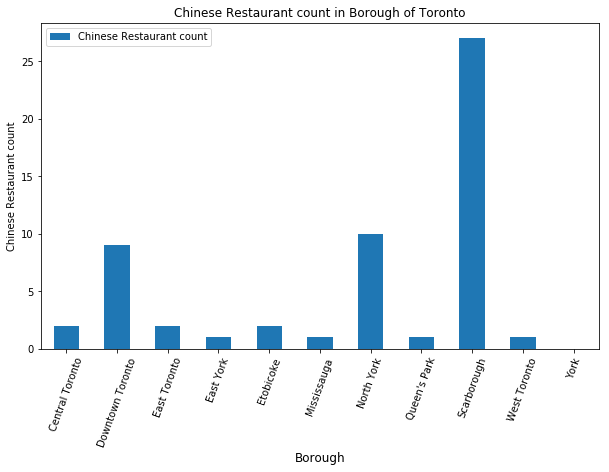

In [59]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

df_barchart.plot(kind='bar',x = 'Borough', y = 'Chinese Restaurant', label = 'Chinese Restaurant count', figsize=(10, 6))

plt.xticks(rotation=70)
plt.xlabel('Borough', fontsize = 12) # add to x-label to the plot
plt.ylabel('Chinese Restaurant count') # add y-label to the plot
plt.title('Chinese Restaurant count in Borough of Toronto') # add title to the plot

plt.show()

In [54]:
#Merge all the population table with the ethnic percentage by neighborhood
frame = [trt_e_york,north_york,scarb,eto_york]
df_ethnic = pd.concat(frame,sort = False, ignore_index = True)
df_ethnic

,Riding,Population,Ethnic Origin #1,Origin #1 %,Ethnic Origin #2,Origin #2 %,Ethnic Origin #3,Origin #3 %,Ethnic Origin #4,Origin #4 %,Ethnic Origin #5,Origin #5 %,Ethnic Origin #6,Origin #6 %,Ethnic Origin #7,Origin #7 %,Ethnic Origin #8,Origin #8 %,Ethnic Origin #9,Origin #9 %
0,Spadina-Fort York,114315,English,16.4,Chinese,16.0,Irish,14.6,Canadian,14.0,Scottish,13.2,French,7.70,German,7.6,NaN,NaN,NaN,NaN
1,Beaches-East York,108435,English,24.2,Irish,19.9,Canadian,19.7,Scottish,18.9,French,8.7,German,8.40,NaN,NaN,NaN,NaN,NaN,NaN
2,Davenport,107395,Portuguese,22.7,English,13.6,Canadian,12.8,Irish,11.5,Italian,11.1,Scottish,11.00,NaN,NaN,NaN,NaN,NaN,NaN
3,Parkdale-High Park,106445,English,22.3,Irish,20.0,Scottish,18.7,Canadian,16.1,German,9.8,French,8.88,Polish,8.5,NaN,NaN,NaN,NaN
4,Toronto-Danforth,105395,English,22.9,Irish,19.5,Scottish,18.7,Canadian,18.4,Chinese,13.8,French,8.86,German,8.8,Greek,7.3,NaN,NaN
5,Toronto-St. Paul's,104940,English,18.5,Canadian,16.1,Irish,15.2,Scottish,14.8,Polish,10.3,German,7.90,Russian,7.7,Italian,7.3,French,7.2
6,University-Rosedale,100520,English,20.6,Irish,16.6,Scottish,16.3,Canadian,15.2,Chinese,14.7,German,8.70,French,7.7,Italian,7.4,NaN,NaN
7,Toronto Centre,99590,English,15.7,Canadian,13.7,Irish,13.4,Scottish,12.6,Chinese,12.5,French,7.20,NaN,NaN,NaN,NaN,NaN,NaN
8,Willowdale,117405,Chinese,25.9,Iranian,12.1,Korean,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Eglinton-Lawrence,112925,Canadian,14.7,English,12.6,Polish,12.0,Filipino,11.0,Scottish,9.7,Italian,9.50,Irish,9.2,Russian,8.4,NaN,NaN


In [55]:
#Filtering the riding with Indian ethnic crowd
drop = df_ethnic[(df_ethnic['Ethnic Origin #1'] == 'Chinese')| 
                 (df_ethnic['Ethnic Origin #2'] == 'Chinese')|
                 (df_ethnic['Ethnic Origin #3'] == 'Chinese')|
                 (df_ethnic['Ethnic Origin #4'] == 'Chinese')|
                 (df_ethnic['Ethnic Origin #5'] == 'Chinese')|
                 (df_ethnic['Ethnic Origin #6'] == 'Chinese')|
                 (df_ethnic['Ethnic Origin #7'] == 'Chinese')|
                 (df_ethnic['Ethnic Origin #8'] == 'Chinese')|
                 (df_ethnic['Ethnic Origin #9'] == 'Chinese')]
df_cn = pd.DataFrame(drop).reset_index()
df_cn.drop('index',axis=1,inplace=True)

df_cn

,Riding,Population,Ethnic Origin #1,Origin #1 %,Ethnic Origin #2,Origin #2 %,Ethnic Origin #3,Origin #3 %,Ethnic Origin #4,Origin #4 %,Ethnic Origin #5,Origin #5 %,Ethnic Origin #6,Origin #6 %,Ethnic Origin #7,Origin #7 %,Ethnic Origin #8,Origin #8 %,Ethnic Origin #9,Origin #9 %
0,Spadina-Fort York,114315,English,16.4,Chinese,16.0,Irish,14.6,Canadian,14.0,Scottish,13.2,French,7.70,German,7.6,NaN,NaN,NaN,NaN
1,Toronto-Danforth,105395,English,22.9,Irish,19.5,Scottish,18.7,Canadian,18.4,Chinese,13.8,French,8.86,German,8.8,Greek,7.3,NaN,NaN
2,University-Rosedale,100520,English,20.6,Irish,16.6,Scottish,16.3,Canadian,15.2,Chinese,14.7,German,8.70,French,7.7,Italian,7.4,NaN,NaN
3,Toronto Centre,99590,English,15.7,Canadian,13.7,Irish,13.4,Scottish,12.6,Chinese,12.5,French,7.20,NaN,NaN,NaN,NaN,NaN,NaN
4,Willowdale,117405,Chinese,25.9,Iranian,12.1,Korean,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Don Valley North,109060,Chinese,32.4,East Indian,7.3,Iranian,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Don Valley West,101790,English,19.2,Canadian,15.1,Scottish,14.9,Irish,14.2,Chinese,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Don Valley East,93170,East Indian,10.6,Canadian,10.4,English,10.1,Chinese,8.9,Irish,8.1,Scottish,8.00,Filipino,7.8,NaN,NaN,NaN,NaN
8,Scarborough Centre,110450,Filipino,13.1,East Indian,12.2,Canadian,11.2,Chinese,10.7,English,7.8,Sri Lankan,7.00,NaN,NaN,NaN,NaN,NaN,NaN
9,Scarborough Southwest,108295,Canadian,16.2,English,14.3,Irish,11.5,Scottish,10.9,Filipino,9.5,East Indian,8.20,Chinese,7.2,NaN,NaN,NaN,NaN


In [56]:
columns_list = df_cn.columns.to_list()
pop_pct_cn = pd.DataFrame()

del columns_list[0]
del columns_list[1]

for i in range(0,df_cn.shape[0]):
    for j in columns_list:
        print(j)
        if df_cn.at[i, j] == 'Chinese':
            k = columns_list.index(j) + 1
            pct_col = columns_list[k]
            pop_pct_cn = pop_pct_cn.append({'Riding':df_cn.at[i, 'Riding'], 'Population':df_cn.at[i, 'Population']
                                                                           , 'Ethnicity': df_cn.at[i, j], 'Percentage': df_cn.at[i, pct_col]},ignore_index=True)

pop_pct_cn

Population
Origin #1 %
Ethnic Origin #2
Origin #2 %
Ethnic Origin #3
Origin #3 %
Ethnic Origin #4
Origin #4 %
Ethnic Origin #5
Origin #5 %
Ethnic Origin #6
Origin #6 %
Ethnic Origin #7
Origin #7 %
Ethnic Origin #8
Origin #8 %
Ethnic Origin #9
Origin #9 %
Population
Origin #1 %
Ethnic Origin #2
Origin #2 %
Ethnic Origin #3
Origin #3 %
Ethnic Origin #4
Origin #4 %
Ethnic Origin #5
Origin #5 %
Ethnic Origin #6
Origin #6 %
Ethnic Origin #7
Origin #7 %
Ethnic Origin #8
Origin #8 %
Ethnic Origin #9
Origin #9 %
Population
Origin #1 %
Ethnic Origin #2
Origin #2 %
Ethnic Origin #3
Origin #3 %
Ethnic Origin #4
Origin #4 %
Ethnic Origin #5
Origin #5 %
Ethnic Origin #6
Origin #6 %
Ethnic Origin #7
Origin #7 %
Ethnic Origin #8
Origin #8 %
Ethnic Origin #9
Origin #9 %
Population
Origin #1 %
Ethnic Origin #2
Origin #2 %
Ethnic Origin #3
Origin #3 %
Ethnic Origin #4
Origin #4 %
Ethnic Origin #5
Origin #5 %
Ethnic Origin #6
Origin #6 %
Ethnic Origin #7
Origin #7 %
Ethnic Origin #8
Origin #8 %
Ethnic Or

,Ethnicity,Percentage,Population,Riding
0,Chinese,16.0,114315.0,Spadina-Fort York
1,Chinese,13.8,105395.0,Toronto-Danforth
2,Chinese,14.7,100520.0,University-Rosedale
3,Chinese,12.5,99590.0,Toronto Centre
4,Chinese,11.2,101790.0,Don Valley West
5,Chinese,8.9,93170.0,Don Valley East
6,Chinese,10.7,110450.0,Scarborough Centre
7,Chinese,7.2,108295.0,Scarborough Southwest
8,Chinese,7.1,101115.0,Scarborough-Guildwood


In [57]:
pop_pct_cn['Chinese Population'] = (pop_pct_cn['Percentage'] * pop_pct_cn['Population'])/100
pop_pct_cn.drop(columns={'Percentage','Population','Ethnicity'},axis=1, inplace =True)

pop_pct_cn

,Riding,Chinese Population
0,Spadina-Fort York,18290.400
1,Toronto-Danforth,14544.510
2,University-Rosedale,14776.440
3,Toronto Centre,12448.750
4,Don Valley West,11400.480
5,Don Valley East,8292.130
6,Scarborough Centre,11818.150
7,Scarborough Southwest,7797.240
8,Scarborough-Guildwood,7179.165


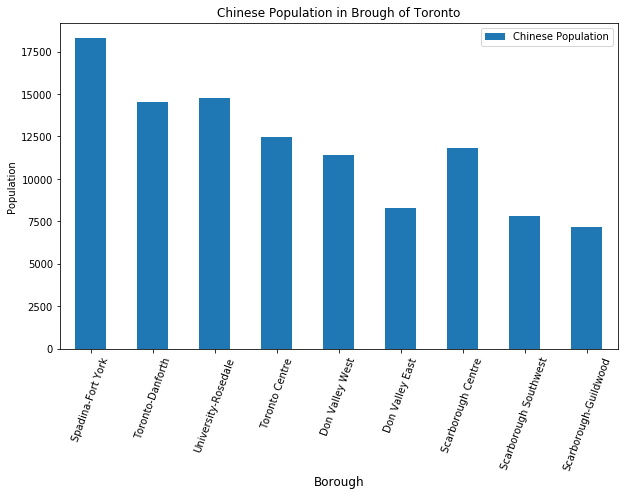

In [60]:
pop_pct_cn.plot(kind='bar',x = 'Riding', y = 'Chinese Population', label = 'Chinese Population', figsize=(10, 6))

plt.xticks(rotation=70)
plt.xlabel('Borough', fontsize = 12) # add to x-label to the plot
plt.ylabel('Population') # add y-label to the plot
plt.title('Chinese Population in Brough of Toronto') # add title to the plot

plt.show()

# Predictive Modelling

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)


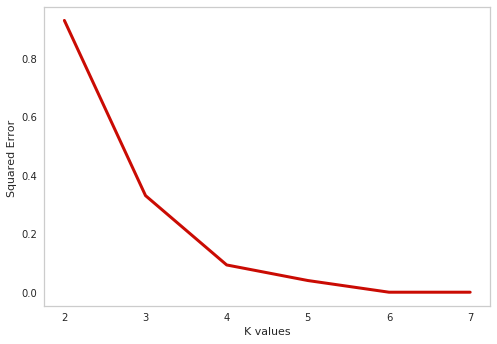

In [113]:
from sklearn.cluster import KMeans

trt_cluster = trt_cn_rest.drop('Neighbourhood', 1)

error_cost = []

for i in range(2,8):
    KM = KMeans(n_clusters = i, max_iter = 100)
    try:
        KM.fit(trt_cluster)
    except ValueError:
        print("error on line",i)
    
    
    
    
    #calculate squared error for the clustered points
    error_cost.append(KM.inertia_/100)

#plot the K values aganist the squared error cost
plt.plot(range(2,8), error_cost, color='r', linewidth='3')
plt.xlabel('K values')
plt.ylabel('Squared Error ')
plt.grid(color='white', linestyle='-', linewidth=2)
plt.show()

In [67]:
kclusters = 6

trt_cluster = trt_cn_rest.drop('Neighbourhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(trt_cluster)

labels = kmeans.labels_
print(labels)

[0 3 1 0 0 0 2 0 0 0 0 0 0 2 0 0 0 2 2 4 4 2 2 0 2 0 0 0 0 2 0 0 0 0 4 0 0
 2 0 2 5 2 0 0 0 2 0 0 0 0 0 2 0 0 2 0 0 0 0 2 0 1 0 0 0 0 0 0 0 2 0 2 2 2
 2 0 0 2 0 2 0 0 0 0 2 0 0 0 2 0 0 0 0 2 0 4 0 2 0 0 0]


In [80]:
trt_cn_rest

,Neighbourhood,Chinese Restaurant
0,"Adelaide, King, Richmond",0
1,Agincourt,7
2,"Agincourt North, L'Amoreaux East, Milliken, St...",5
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",0
4,"Alderwood, Long Branch",0
5,"Bathurst Manor, Downsview North, Wilson Heights",0
6,Bayview Village,1
7,"Bedford Park, Lawrence Manor East",0
8,Berczy Park,0
9,"Birch Cliff, Cliffside West",0


In [107]:
trt_cn_rest.insert(0, 'Cluster Labels', labels)

df_new_cn_rest = df_new

df_new_cn_rest = df_new_cn_rest.join(trt_cn_rest.set_index('Neighbourhood'), on='Neighbourhood')
df_new_cn_rest.dropna(subset=["Cluster Labels"], axis=0, inplace=True)
df_new_cn_rest.reset_index(drop=True, inplace=True)
df_new_cn_rest['Cluster Labels'].astype(int)

df_new_cn_rest.head()


,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,Chinese Restaurant
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,2.0,1.0
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,0.0,0.0
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0.0,0.0
3,M1G,Scarborough,Woburn,43.770992,-79.216917,2.0,1.0
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,2.0,1.0


In [83]:
import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


markers_colors = []
for lat, lon, poi, cluster in zip(df_new_cn_rest['Latitude'], df_new_cn_rest['Longitude'], df_new_cn_rest['Neighbourhood'], df_new_cn_rest['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

# Examing the Clusters

In [85]:
df_new_cn_rest.loc[df_new_cn_rest['Cluster Labels'] == 0]

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,Chinese Restaurant
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,0.0,0.0
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0.0,0.0
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476,0.0,0.0
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577,0.0,0.0
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476,0.0,0.0
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848,0.0,0.0
11,M1R,Scarborough,"Maryvale, Wexford",43.750072,-79.295849,0.0,0.0
17,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,0.0,0.0
19,M2L,North York,"Silver Hills, York Mills",43.757490,-79.374714,0.0,0.0
20,M2M,North York,"Newtonbrook, Willowdale",43.789053,-79.408493,0.0,0.0


In [119]:
df_new_cn_rest.loc[df_new_cn_rest['Cluster Labels'] == 1]

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,Chinese Restaurant
14,M1V,Scarborough,"Agincourt North, L'Amoreaux East, Milliken, St...",43.815252,-79.284577,1.0,5.0
15,M1W,Scarborough,L'Amoreaux West,43.799525,-79.318389,1.0,5.0


In [122]:
df_new_cn_rest.loc[df_new_cn_rest['Cluster Labels'] == 2]

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,Chinese Restaurant
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,2.0,1.0
3,M1G,Scarborough,Woburn,43.770992,-79.216917,2.0,1.0
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,2.0,1.0
13,M1T,Scarborough,"Clarks Corners, Sullivan, Tam O'Shanter",43.781638,-79.304302,2.0,1.0
16,M2H,North York,Hillcrest Village,43.803762,-79.363452,2.0,1.0
18,M2K,North York,Bayview Village,43.786947,-79.385975,2.0,1.0
24,M3A,North York,Parkwoods,43.753259,-79.329656,2.0,1.0
26,M3C,North York,"Flemingdon Park, Don Mills South",43.725900,-79.340923,2.0,1.0
28,M3J,North York,"Northwood Park, York University",43.767980,-79.487262,2.0,1.0
29,M3K,North York,"CFB Toronto, Downsview East",43.737473,-79.464763,2.0,1.0


In [88]:
df_new_cn_rest.loc[df_new_cn_rest['Cluster Labels'] == 3]

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,Chinese Restaurant
12,M1S,Scarborough,Agincourt,43.7942,-79.262029,3.0,7.0


In [89]:
df_new_cn_rest.loc[df_new_cn_rest['Cluster Labels'] == 4]

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,Chinese Restaurant
10,M1P,Scarborough,"Dorset Park, Scarborough Town Centre, Wexford ...",43.757410,-79.273304,4.0,2.0
21,M2N,North York,Willowdale South,43.770120,-79.408493,4.0,2.0
56,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,4.0,2.0
66,M5T,Downtown Toronto,"Chinatown, Grange Park, Kensington Market",43.653206,-79.400049,4.0,2.0


In [90]:
df_new_cn_rest.loc[df_new_cn_rest['Cluster Labels'] == 5]

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,Chinese Restaurant
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029,5.0,4.0
